In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sbn
import itertools
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
%pwd

'/home/kc3pve/Desktop/Spring-Git/Springboard/Credit/Notebooks'

In [3]:
os.chdir('/home/kc3pve/Desktop/Spring-Data/Springboard/archive')
dir1 = %pwd

In [4]:
%pwd
# Load dataset
data = pd.read_csv(dir1 + '/application_record.csv')
cstory = pd.read_csv(dir1 +'/credit_record.csv')


# Inspect data
cstory.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
%cd /home/kc3pve/Desktop/Spring-Git/Springboard

/home/kc3pve/Desktop/Spring-Git/Springboard


In [6]:
# remove the restriction on the output of columns
# and let's check number of rows and columns
pd.set_option('display.max_columns', None)

data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [7]:
# Analyse the data...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
# ...and credit record
cstory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
# So, since data must be of a numeric type for machine learning, 
# we will have to transform some data, get rid of unnecessary data, as well as missing data.

data['ID'].nunique()

438510

In [10]:
# There are over 45000 unique data, although there are only more thna a million (1048575) of them. 
# This indicates the presence of duplicates, as well as changes in status over time
cstory['ID'].nunique() 

45985

In [11]:
len(set(data['ID']).intersection(set(cstory['ID']))) # checking to see how many records match in two 

36457

# Data processing and analysis (clearing and etc.)

In [12]:
data.isnull().sum() 

# About a quarter of the data in OCCUPATION_TYPE is lost. 
# In addition, they are of type object - in fact, a regular string. 
# We will have to get rid of this variable

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [13]:
cstory.isnull().sum()


ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [14]:
# Now, we remove duplicates

data = data.drop_duplicates('ID', keep='last')

In [15]:
# We check again the data and see the total number of rows. There should be 438510.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [16]:
# Now, we remove OCCUPATION_TYPE.  It has too many missed data
# Also, we get rid of FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE and FLAG_EMAIL. 
# These parameters do not affect in any way whether a person is creditworthy or not.

data.drop(['OCCUPATION_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis=1, inplace=True) 

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  CNT_FAM_MEMBERS      438510 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 46.8+ MB


In [18]:
# Now, it's time to parse the data type object. 
# It is necessary to determine whether they have any value for evaluating credit, 
# and also to evaluate the possibility of converting data to a numeric type.

objects_data = pd.DataFrame(data.dtypes =='object').reset_index()
object_type = objects_data[objects_data[0] == True]['index']
object_type


1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [19]:
# First, let's find out what data the columns contain so that we can properly train our model. 
# Since we see that there are quite a lot of important parameters, 
# we will try to translate all this into numerical values.

a = data[object_type]['CODE_GENDER'].value_counts()
b = data[object_type]['FLAG_OWN_CAR'].value_counts()
c = data[object_type]['FLAG_OWN_REALTY'].value_counts()
d = data[object_type]['NAME_INCOME_TYPE'].value_counts()
e = data[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = data[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = data[object_type]['NAME_HOUSING_TYPE'].value_counts()

print('\n',a,'\n\n',b,'\n\n',c,'\n\n',d,'\n\n',e,'\n\n',f,'\n\n',g)


 F    294412
M    144098
Name: CODE_GENDER, dtype: int64 

 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 

 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 

 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 

 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 

 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 

 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
N

In [20]:
# Now, let's convert all non-numeric data to numeric data using LabelEncoder().
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes == 'object':
        data[x] = le.fit_transform(data[x])

In [21]:
data.head(10)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0


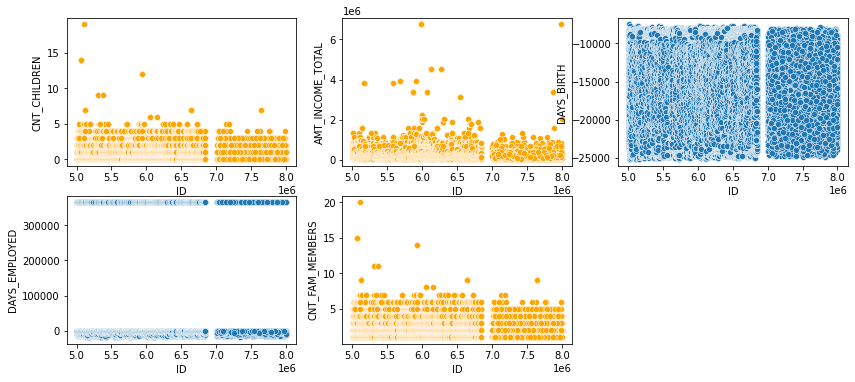

In [22]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sbn.scatterplot(x='ID', y='CNT_CHILDREN', data=data, ax=ax[0][0], color= 'orange')
sbn.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=data, ax=ax[0][1], color='orange')
sbn.scatterplot(x='ID', y='DAYS_BIRTH', data=data, ax=ax[0][2])
sbn.scatterplot(x='ID', y='DAYS_EMPLOYED', data=data, ax=ax[1][0])
sbn.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=data, ax=ax[1][1], color= 'orange')
fig.delaxes(ax[1][2])

# So, as a result, we have emissions in CNT_CHILDREN, AMT_INCOME_TOTAL and CNT_FAM_MEMBERS. 
# This can have a bad effect on model training, so you need to exclude outliers from the data sample.

In [23]:
# for CNT_CHILDREN
q_hi = data['CNT_CHILDREN'].quantile(0.999)
q_low = data['CNT_CHILDREN'].quantile(0.001)
data = data[(data['CNT_CHILDREN']>q_low) & (data['CNT_CHILDREN']<q_hi)]

In [24]:
# for AMT_INCOME_TOTAL
q_hi = data['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = data['AMT_INCOME_TOTAL'].quantile(0.001)
data = data[(data['AMT_INCOME_TOTAL']>q_low) & (data['AMT_INCOME_TOTAL']<q_hi)]

In [25]:
# for CNT_FAM_MEMBERS
q_hi = data['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = data['CNT_FAM_MEMBERS'].quantile(0.001)
data = data[(data['CNT_FAM_MEMBERS']>q_low) & (data['CNT_FAM_MEMBERS']<q_hi)]

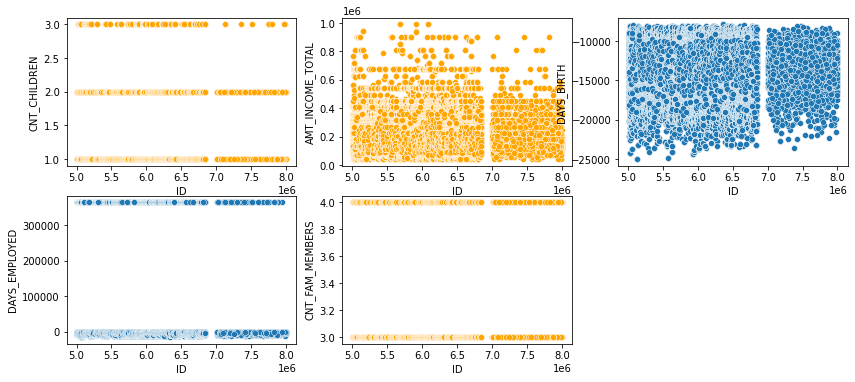

In [26]:
# Repeat what we did before

fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sbn.scatterplot(x='ID', y='CNT_CHILDREN', data=data, ax=ax[0][0], color= 'orange')
sbn.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=data, ax=ax[0][1], color='orange')
sbn.scatterplot(x='ID', y='DAYS_BIRTH', data=data, ax=ax[0][2])
sbn.scatterplot(x='ID', y='DAYS_EMPLOYED', data=data, ax=ax[1][0])
sbn.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=data, ax=ax[1][1], color= 'orange')
fig.delaxes(ax[1][2])

In [27]:
cstory['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [28]:
cstory.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [29]:
# Now you need to slightly correct the data in STATUS. 
# Any bank will not lend to a person who is already in debt, 
# so let 0 be no debt at all (including debt repayment this month (C) and no credit history (X)). 
# Otherwise 1 - this means the presence of any debt at all.

cstory['STATUS'].replace({'C': -1, 'X' : -1}, inplace=True)
cstory['STATUS'] = cstory['STATUS'].astype('int')
cstory['STATUS'] = cstory['STATUS'].apply(lambda x:1 if x > 0 else 0)

In [30]:
# Before continuing our research, let's count how many people have paid off their loans, 
# and how many still have debts.

cstory['STATUS'].value_counts(normalize = True)

# As you can see, we are seeing the phenomenon of oversampling: 
# 99% of people have paid off their debt, 1% have not yet done so. 
# This means that our sample may not be representative, and the machine will not be able to correctly learn 
# to determine who should be given a credit and who should not. 
# To fix the problem, we need to merge both sets of our data.

0    0.986464
1    0.013536
Name: STATUS, dtype: float64

In [31]:
# Next, we'll create a new cstory_gbid dataset that we'll group by loan applicant ID. 
# This way we can successfully link both tables. 
# For convenience, we'll make the ID the index of the table.

cstory_gbid = cstory.groupby('ID').agg(max).reset_index()
cstory_gbid

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


# Data splitting


In [32]:
# Now, we create a new dataset called full_data, which we immediately merge with cstory_gbid

full_data = data.join(cstory_gbid.set_index('ID'), on='ID', how='inner')
full_data.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
full_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0


In [33]:
# We have significantly reduced the data set... 

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  CNT_FAM_MEMBERS      9516 non-null   float64
 13  STATUS               9516 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [34]:
# ...but it still suffers from oversampling

full_data['STATUS'].value_counts(normalize=True)

# Since we cannot train the model with numbers like this, we will have to solve a dilemma: 
# either reduce the number of people without debt so that their number equals people with debt, 
# or increase the number of people with debt.

0    0.879676
1    0.120324
Name: STATUS, dtype: float64

In [35]:
# Since we can lose a huge amount of data when reducing people without debt, and reduce the accuracy of the machine, 
# we will choose the second path. 
# At first, the thought comes to us that we will simply have to duplicate existing data, 
# but SMOTE (Synthetic Minority Over-sampling Technique) comes to the rescue. 
# This is an algorithm that will help us "generate" new data and avoid overfitting the model.

X = full_data.iloc[:,1:-1] # X value contains all the variables except labels
y = full_data.iloc[:,-1] # these are the labels
y

29        0
30        0
31        0
32        0
33        0
         ..
434779    1
434780    1
434782    1
434791    1
434805    1
Name: STATUS, Length: 9516, dtype: int64

In [36]:
# First, we divide the data: 
# into those that will be used to train the model 
# and those that will be used to predict approval.

# Usually, it is customary to divide the data as follows: 
# 70% is used for training the model, and 30% for testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
# Next, we will use the SMOTE algorithm to make up for the lack of data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

In [38]:
# Let's compare the amount of data before and after the SMOTE algorithm. 
# As we can see, now the number of debtors 
# and people who have no debts (or do not have a credit history) are equal, 
# and we can safely train our model.

a = y_train.value_counts()
b = y_balanced.value_counts()
print(a, "\n\n", b)


0    5866
1     795
Name: STATUS, dtype: int64 

 0    5866
1    5866
Name: STATUS, dtype: int64


In [39]:
a = y_test.value_counts()
b = y_test_balanced.value_counts()
print(a, "\n\n", b)

0    2505
1     350
Name: STATUS, dtype: int64 

 0    2505
1    2505
Name: STATUS, dtype: int64


## Choice of algorithms, model training and evaluation of predictions


In [40]:
# plot_confusion_matrix is a function that is used to output the confusion matrix. 
# This is a table that is used in machine learning tasks to evaluate where errors were made in the model. 
# The rows represent the classes that the results should have been, and the columns represent the predictions we made. 
# Using this table, it is easy to see which predictions are wrong.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy Score is 0.8165669
      0     1
0  2262   243
1   676  1829
Normalized confusion matrix
[[0.90299401 0.09700599]
 [0.26986028 0.73013972]]


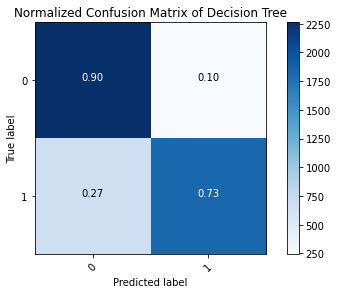

In [41]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(max_depth=16,
                               min_samples_split=8,
                               random_state=1024)

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Decision Tree')

Accuracy Score is 0.8107784
      0     1
0  2311   194
1   754  1751
Normalized confusion matrix
[[0.92255489 0.07744511]
 [0.300998   0.699002  ]]


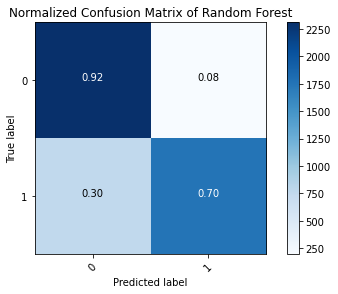

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250,
                              max_depth=16,
                              min_samples_leaf=12
                              )

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Random Forest')

Accuracy Score is 0.5161677
      0    1
0  1714  791
1  1633  872
Normalized confusion matrix
[[0.68423154 0.31576846]
 [0.65189621 0.34810379]]


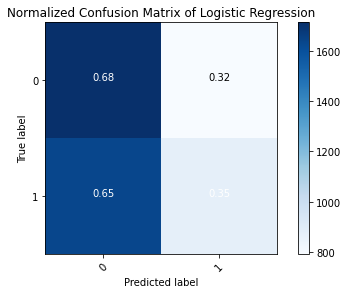

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Logistic Regression')

In [44]:
path1 = os.getcwd()

In [45]:
path1

'/home/kc3pve/Desktop/Spring-Git/Springboard'

In [46]:
dir2 = path1 + '/' + 'Credit/data/'

In [47]:
dir2

'/home/kc3pve/Desktop/Spring-Git/Springboard/Credit/data/'

In [48]:
#Concat both train and test files for saving :X
X_df = pd.concat([X_balanced, X_test_balanced])

In [49]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16742 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          16742 non-null  int64  
 1   FLAG_OWN_CAR         16742 non-null  int64  
 2   FLAG_OWN_REALTY      16742 non-null  int64  
 3   CNT_CHILDREN         16742 non-null  int64  
 4   AMT_INCOME_TOTAL     16742 non-null  float64
 5   NAME_INCOME_TYPE     16742 non-null  int64  
 6   NAME_EDUCATION_TYPE  16742 non-null  int64  
 7   NAME_FAMILY_STATUS   16742 non-null  int64  
 8   NAME_HOUSING_TYPE    16742 non-null  int64  
 9   DAYS_BIRTH           16742 non-null  int64  
 10  DAYS_EMPLOYED        16742 non-null  int64  
 11  CNT_FAM_MEMBERS      16742 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 1.7 MB


In [50]:
#Concat both train and test files for saving : Y

Y_df = pd.concat([y_balanced, y_test_balanced])

In [51]:
Y_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 16742 entries, 0 to 5009
Series name: STATUS
Non-Null Count  Dtype
--------------  -----
16742 non-null  int64
dtypes: int64(1)
memory usage: 261.6 KB


In [54]:
X_df.to_csv(dir2 +'X_df.csv')

In [55]:
Y_df.to_csv(dir2 +'Y_df.csv')